# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [10]:
#P(bowl 1 | Vanilla cookie) = ((P(Vanilla Cookie | bowl 1)*P(Bowl 1))/P(Chocolate cookie))
P_bowl_1_given_vanilla_cookie = ((0.75*0.5)/0.375)
P_bowl_1_given_vanilla_cookie

1.0

What is the probability that it came from Bowl 2?

In [11]:
#P(Bowl 2 | Vanilla cookie) = ((P(Vanilla Cookie | bowl 2)*P(Bowl 2))/P(Chocolate cookie))
P_bowl_2_given_vanilla_cookie = ((0.5*0.5)/0.375)
P_bowl_2_given_vanilla_cookie

0.6666666666666666

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [12]:
#P(bowl 1 | Chocolate cookie) = ((P(Chocolate Cookie | bowl 1)*P(Bowl 1))/P(Vanilla cookie))
P_bowl_1_given_chocolate_cookie = ((0.25*0.5)/0.625)
P_bowl_1_given_chocolate_cookie

0.2

In [13]:
#P(bowl 2 | Chocolate cookie) = ((P(Chocolate Cookie | bowl 2)*P(Bowl 2))/P(Vanilla cookie))
P_bowl_1_given_chocolate_cookie = ((0.5*0.5)/0.625)
P_bowl_1_given_chocolate_cookie

0.4

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

L*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [14]:
# Let's crunch the math first:
#   P(Bag1|yellow) = P(yellow|Bag1) * P(Bag1) / P(Yellow) --> P(Bag1|yellow) = .2 * .5 / (1/2)*(.2+.14)

yellow_b1 = .2*.5/(.5*(.2+.14))

print('The probability that the yellow one came from the Bag 1 is {:0.02%}'.format(yellow_b1))

The probability that the yellow one came from the Bag 1 is 58.82%


What is the probability that the yellow candy came from Bag 2?

In [15]:
print('The probability that the yellow one came from the Bag 2 is {:0.02%}'.format(1 - yellow_b1))

The probability that the yellow one came from the Bag 2 is 41.18%


In [16]:
# Also, here's the fancy way to do it in Python. 

def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg) 
    return post

priors = [1/2, 1/2]
likelihoods = [20/100, 14/100]
bag1, bag2 = bayes_rule(priors, likelihoods)

print('The probability that the yellow one came from the Bag 1 is {:0.02%}, and the probability that the yellow one came from the Bag 2 is {:0.02%}'.format(bag1, bag2))

The probability that the yellow one came from the Bag 1 is 58.82%, and the probability that the yellow one came from the Bag 2 is 41.18%


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [17]:
priors = [1/2, 1/2]
likelihoods = [10/100, 20/100]
bag1, bag2 = bayes_rule(priors, likelihoods)

print('The probability that the green one came from the Bag 1 is {:0.02%}, and the probability that the green one came from the Bag 2 is {:0.02%}'.format(bag1, bag2))

The probability that the green one came from the Bag 1 is 33.33%, and the probability that the green one came from the Bag 2 is 66.67%


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [28]:
# P(Car|Door A) = 1/3*1/2 / ((1/2))
# P(Car|Door C) = P(Door C|Car) * P(Car) / P(Door C) = 2/3*1/2 / ((1/2))

priors3 = [1/3, 2/3]
likelihoods3 = [1/2, 1/2]

prob = bayes_rule(priors3, likelihoods3)

print('The probability of me winning the car if I stick with Door A is {:0.02%}.'.format(prob[0]))
print('The probability of me winning the car if I switch to Door B is {:0.02%}.'.format(prob[1]))

The probability of me winning the car if I stick with Door A is 33.33%.
The probability of me winning the car if I switch to Door B is 66.67%.


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

In [30]:
# Let's describe our Original Distribution first. 
 
n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))

# Original Observed "wins".
observed = 14

# Simulation based on the Original Distribution. 
def generative_model(param):
    result = np.random.binomial(100, param)
    return result

sim_data = list() 
for p in prior: 
    sim_data.append(generative_model(p))

Produce a set of descriptive statistics for the posterior distribution.

count    975.000000
mean       0.146443
std        0.034110
min        0.052406
25%        0.123260
50%        0.144748
75%        0.167680
max        0.311526
dtype: float64


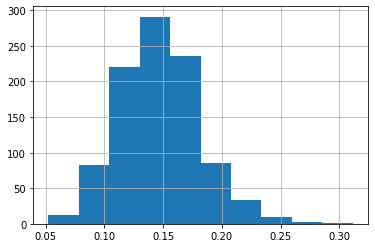

In [31]:
posterior = prior[list(map(lambda x: x == observed, sim_data))]
print(posterior.describe())
posterior.hist()

What is the 90% credible interval range?

In [34]:
print('The 90 percent credible interval range is [{:0.02}, {:0.02}].'.format(posterior.quantile(.025), posterior.quantile(.975)))


The 90 percent credible interval range is [0.084, 0.22].


What is the Maximum Likelihood Estimate?